# Perkenalan

Nama/Batch = Sandika/008

# Import Pustaka

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
import seaborn as sns
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.cm as cm
from sklearn.impute import KNNImputer
from sklearn.mixture import GaussianMixture

# Data Loading

In [ ]:
df_dummy= pd.read_csv('CC GENERAL.csv')

In [ ]:
df_dummy.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df_dummy.shape

(8950, 18)

In [ ]:
df_dummy.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# EDA

In [ ]:
df=df_dummy.copy()

In [ ]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
print('Numeric Columns:', num_col)
print('categorical Columns:', cat_col)

Numeric Columns: Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')
categorical Columns: Index(['CUST_ID'], dtype='object')


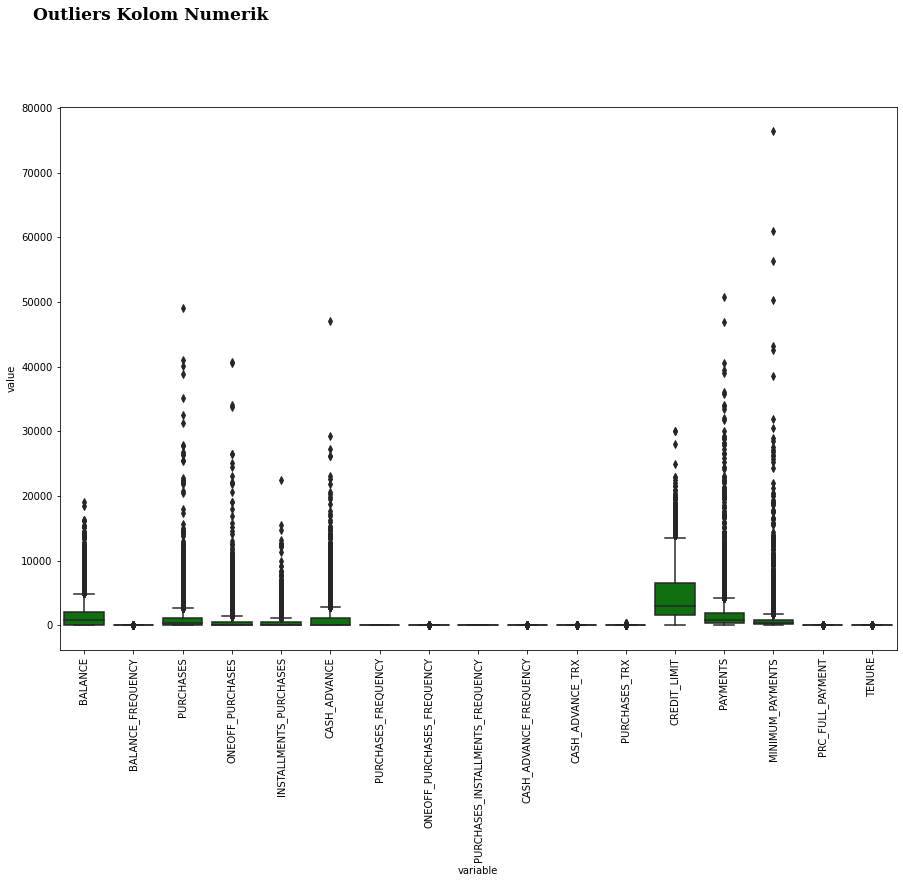

In [ ]:
NumericData = df[[feature for feature in num_col if feature not in []]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.figtext(0.1, 1, "Outliers Kolom Numerik", fontfamily='serif', fontsize=17, fontweight='bold')
bp = sns.boxplot(x='variable', y='value', data=NumericMelt, palette=['g']*len(num_col))
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
outlier_percentage = {}
for feature in num_col:
    tempData = df.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'BALANCE': 7.77,
 'BALANCE_FREQUENCY': 16.68,
 'CASH_ADVANCE': 11.51,
 'CASH_ADVANCE_FREQUENCY': 5.87,
 'CASH_ADVANCE_TRX': 8.98,
 'CREDIT_LIMIT': 2.77,
 'INSTALLMENTS_PURCHASES': 9.69,
 'MINIMUM_PAYMENTS': 9.4,
 'ONEOFF_PURCHASES': 11.32,
 'ONEOFF_PURCHASES_FREQUENCY': 8.74,
 'PAYMENTS': 9.03,
 'PRC_FULL_PAYMENT': 16.47,
 'PURCHASES': 9.03,
 'PURCHASES_FREQUENCY': 0.0,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
 'PURCHASES_TRX': 8.56,
 'TENURE': 15.26}

proses pembuatan boxplot untuk mengetahui outlier beserta persentase jumlahnya

In [ ]:
df.corr().sort_values('CREDIT_LIMIT', ascending=False, key=abs).index

Index(['CREDIT_LIMIT', 'BALANCE', 'PAYMENTS', 'PURCHASES', 'ONEOFF_PURCHASES',
       'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_TRX',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE_TRX', 'TENURE',
       'CASH_ADVANCE_FREQUENCY', 'MINIMUM_PAYMENTS', 'PURCHASES_FREQUENCY',
       'BALANCE_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'PRC_FULL_PAYMENT'],
      dtype='object')

proses mencari data yang paling berkorelasi dengan CREDIT_LIMIT

# Data Preprocessing

In [ ]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

proses mencari data memiliki value NaN

In [ ]:
df = pd.DataFrame(KNNImputer().fit_transform(df[num_col]),columns=df[num_col].columns)

proses pengisian value NaN dengan menggunakan KNN imputer

In [ ]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,379.829982,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [ ]:
df=df.drop(['ONEOFF_PURCHASES',
       'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_TRX',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE_TRX', 'TENURE',
       'CASH_ADVANCE_FREQUENCY', 'MINIMUM_PAYMENTS', 'PURCHASES_FREQUENCY',
       'BALANCE_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'PRC_FULL_PAYMENT'],axis=1)

proses penghapusan kolom yang tidak digunakan untuk clustering

In [ ]:
train_df, test_df = train_test_split(df,test_size=0.2,random_state=21)

In [ ]:
mm = MinMaxScaler()
train_df = mm.fit_transform(train_df)
test_df = mm.transform(test_df)

proses scalling data train dan test

# Model Definition, Training, dan Evaluation

## K-means

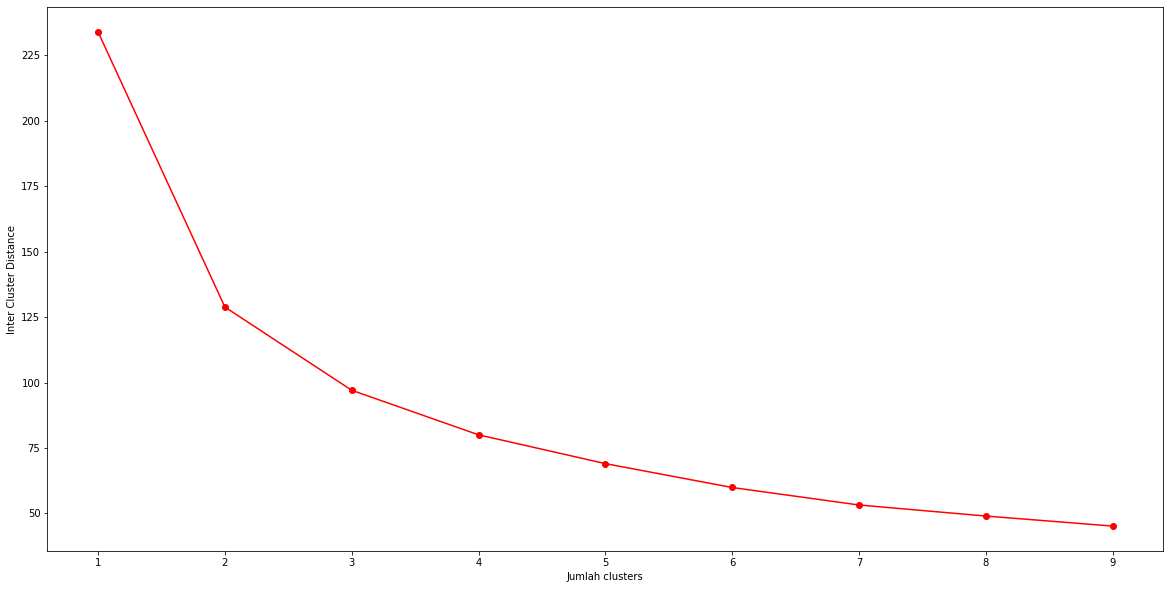

In [ ]:
interclusterdistance = []

for clusters in range(1,10):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=50,random_state=21)
    km.fit(train_df)
    interclusterdistance.append(km.inertia_)
    
plt.figure(figsize=(20,10))
plt.plot(range(1, 10), interclusterdistance, marker='o', color='r')
plt.xlabel('Jumlah clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

garis mulai lurus di k=4

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
  
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(train_df)
    
    cluster_labels = kmeans.labels_
    
  
    silhouette_avg = silhouette_score(train_df, cluster_labels)
    print("For k={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For k=2, the silhouette score is 0.5581257419694705
For k=3, the silhouette score is 0.46325163047983436
For k=4, the silhouette score is 0.4847227620460393
For k=5, the silhouette score is 0.43509760498897027
For k=6, the silhouette score is 0.4232176317499075
For k=7, the silhouette score is 0.3708253794710873
For k=8, the silhouette score is 0.36253653123726637


Text(0, 0.5, 'Silhouette Score')

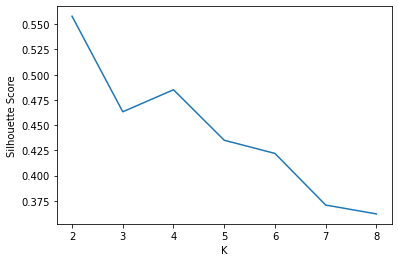

In [ ]:
K=range(2, 9)

s_score=[silhouette_score(train_df, KMeans(n_clusters=i).fit(train_df).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

dipilih k=4

In [ ]:
kmeans = KMeans(n_clusters = 4,init ='k-means++', max_iter=300,random_state=21)
kmeans.fit(train_df)
y_pred = kmeans.predict(train_df)

In [ ]:
cluster_df = pd.DataFrame(train_df,columns = df.columns)
cluster_df['Cluster_K_mean'] = y_pred
cluster_df.head(10)

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,Cluster_K_mean
0,0.295194,0.005343,0.232053,0.034183,1
1,0.050665,0.001611,0.048414,0.007053,2
2,0.053622,0.041191,0.111853,0.035839,2
3,0.017521,0.042315,0.048414,0.032608,2
4,0.011039,0.053641,0.131886,0.049959,2
5,0.001387,0.019395,0.198664,0.017058,0
6,0.001129,0.002243,0.031720,0.001118,2
7,0.010122,0.057423,0.198664,0.040985,0
8,0.095776,0.023981,0.055092,0.026616,2
9,0.054307,0.010814,0.031720,0.014548,2


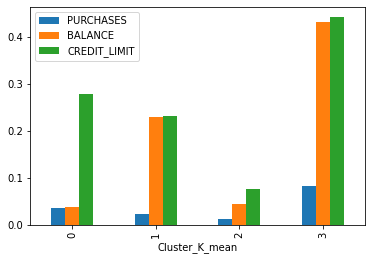

In [ ]:
cluster_df[['PURCHASES','BALANCE','CREDIT_LIMIT','Cluster_K_mean']].groupby('Cluster_K_mean').mean().plot(kind='bar',)
plt.show()

In [ ]:
cluster_0 = cluster_df[cluster_df['Cluster_K_mean'] == 0]
cluster_1 = cluster_df[cluster_df['Cluster_K_mean'] == 1]
cluster_2 = cluster_df[cluster_df['Cluster_K_mean'] == 2]
cluster_3 = cluster_df[cluster_df['Cluster_K_mean'] == 3]

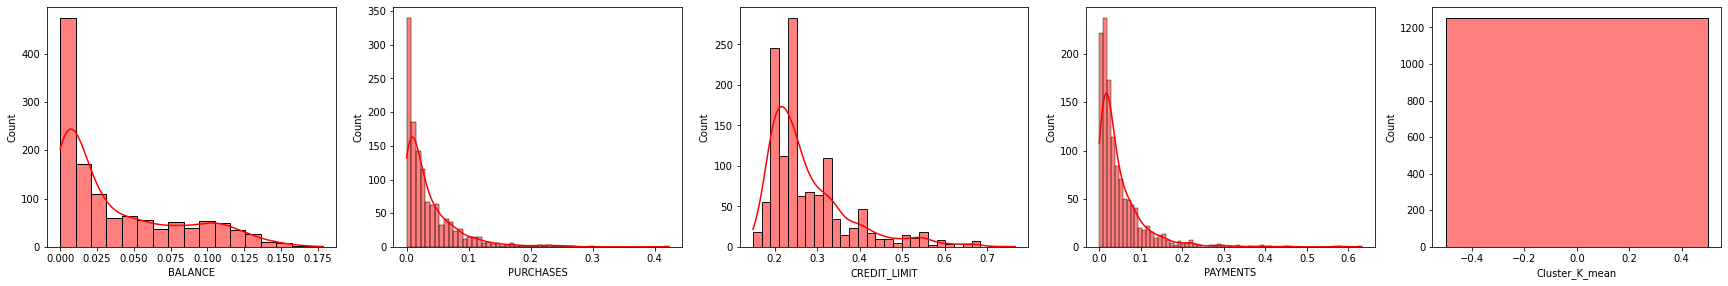

In [ ]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(cluster_0.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = cluster_0, x = cluster_0[col], kde = True, color = 'r')

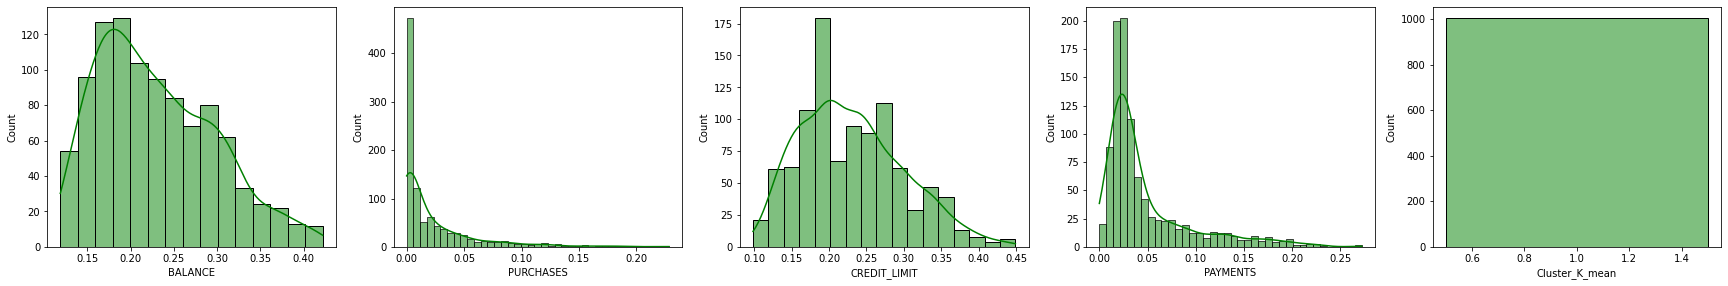

In [ ]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(cluster_1.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = cluster_1, x = cluster_1[col], kde = True, color = 'g')

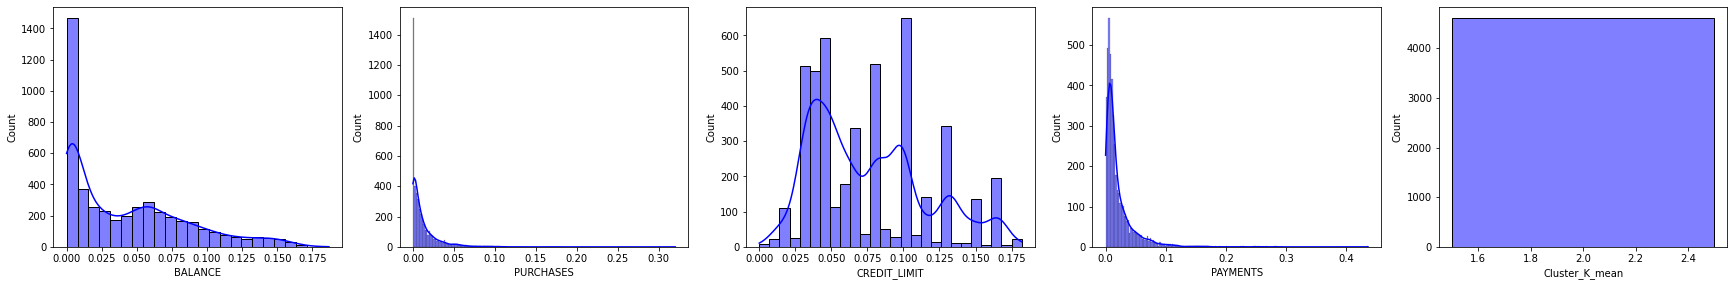

In [ ]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(cluster_2.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = cluster_2, x = cluster_2[col], kde = True, color = 'b')

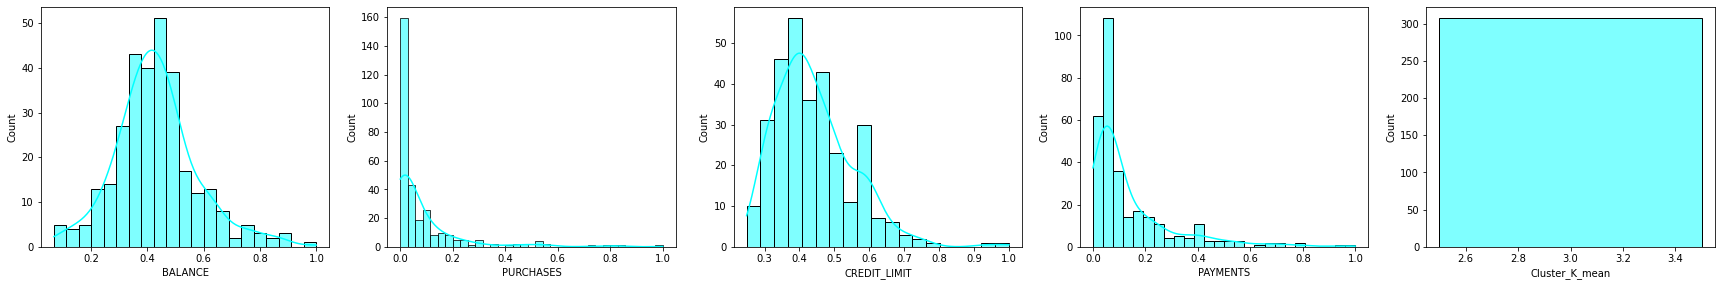

In [ ]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(cluster_3.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = cluster_3, x = cluster_3[col], kde = True, color = 'cyan')

## DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.1,min_samples=4)
dbscan.fit(train_df)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
dbscan_df = pd.DataFrame(train_df,columns = df.columns)
dbscan_df['Cluster_DBSCANS'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,Cluster_DBSCANS
0,0.295194,0.005343,0.232053,0.034183,0
1,0.050665,0.001611,0.048414,0.007053,0
2,0.053622,0.041191,0.111853,0.035839,0
3,0.017521,0.042315,0.048414,0.032608,0
4,0.011039,0.053641,0.131886,0.049959,0
5,0.001387,0.019395,0.198664,0.017058,0
6,0.001129,0.002243,0.031720,0.001118,0
7,0.010122,0.057423,0.198664,0.040985,0
8,0.095776,0.023981,0.055092,0.026616,0
9,0.054307,0.010814,0.031720,0.014548,0


In [ ]:
dbscan_df['Cluster_DBSCANS'].value_counts()

 0    7058
-1      82
 1       9
 3       6
 2       5
Name: Cluster_DBSCANS, dtype: int64

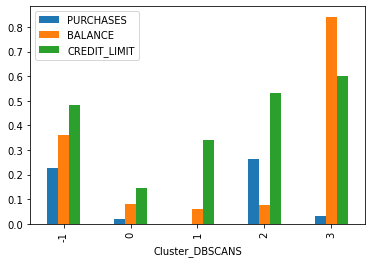

In [ ]:
dbscan_df[['PURCHASES','BALANCE','CREDIT_LIMIT','Cluster_DBSCANS']].groupby('Cluster_DBSCANS').mean().plot(kind='bar',)
plt.show()

In [ ]:
dbscan_cluster_0 = dbscan_df[dbscan_df['Cluster_DBSCANS'] == 0]
dbscan_cluster_beda = dbscan_df[dbscan_df['Cluster_DBSCANS'] == -1]
dbscan_cluster_1 = dbscan_df[dbscan_df['Cluster_DBSCANS'] == 1]
dbscan_cluster_2 = dbscan_df[dbscan_df['Cluster_DBSCANS'] == 2]
dbscan_cluster_3 = dbscan_df[dbscan_df['Cluster_DBSCANS'] == 3]

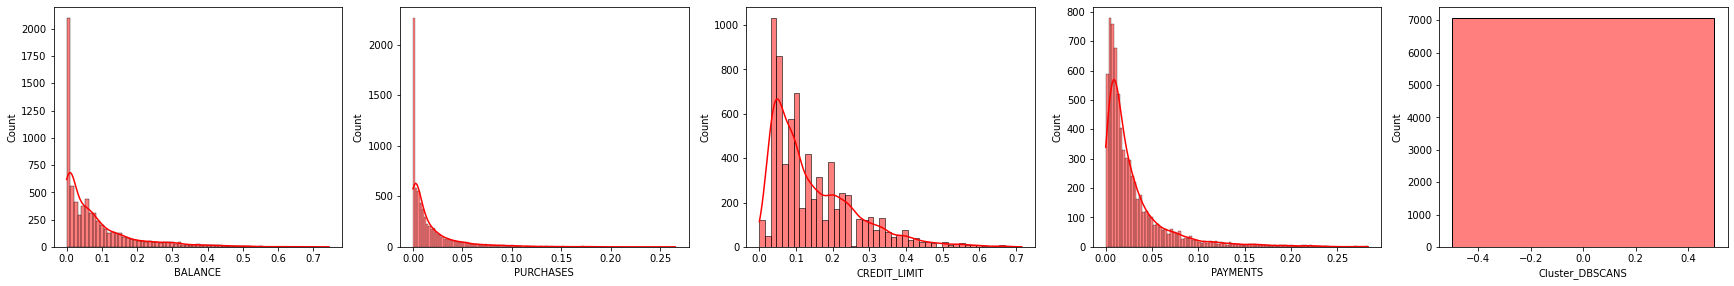

In [ ]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(dbscan_cluster_0.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = dbscan_cluster_0, x = dbscan_cluster_0[col], kde = True, color = 'r')

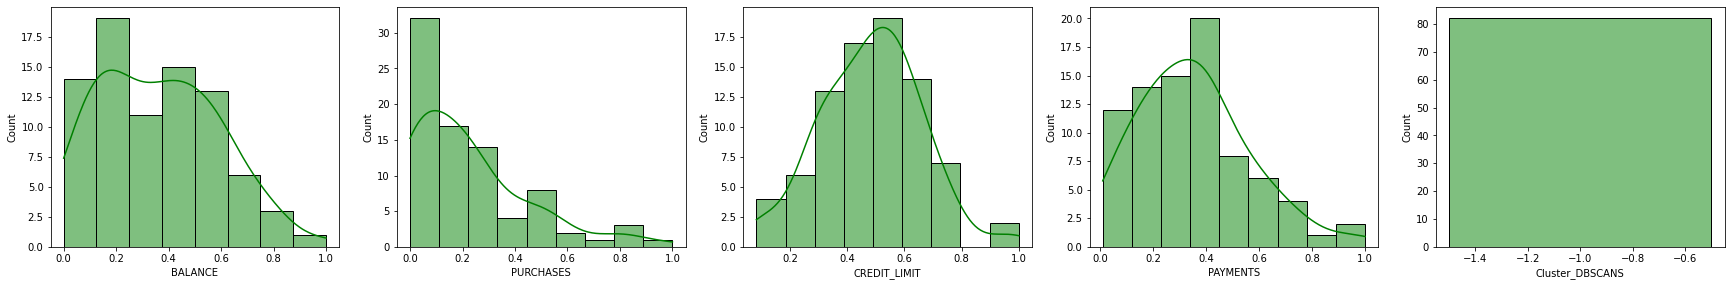

In [ ]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(dbscan_cluster_beda.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = dbscan_cluster_beda, x = dbscan_cluster_beda[col], kde = True, color = 'g')

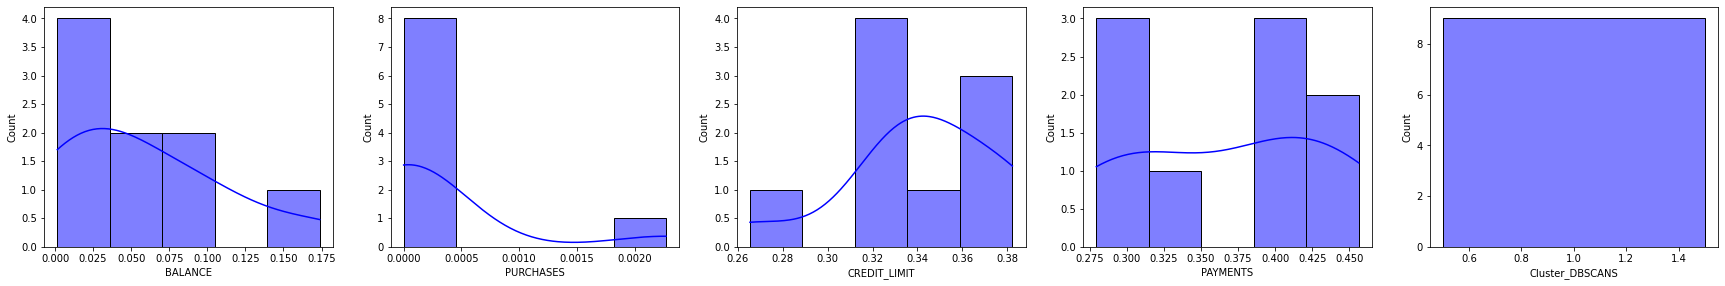

In [ ]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(dbscan_cluster_1.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = dbscan_cluster_1, x = dbscan_cluster_1[col], kde = True, color = 'b')

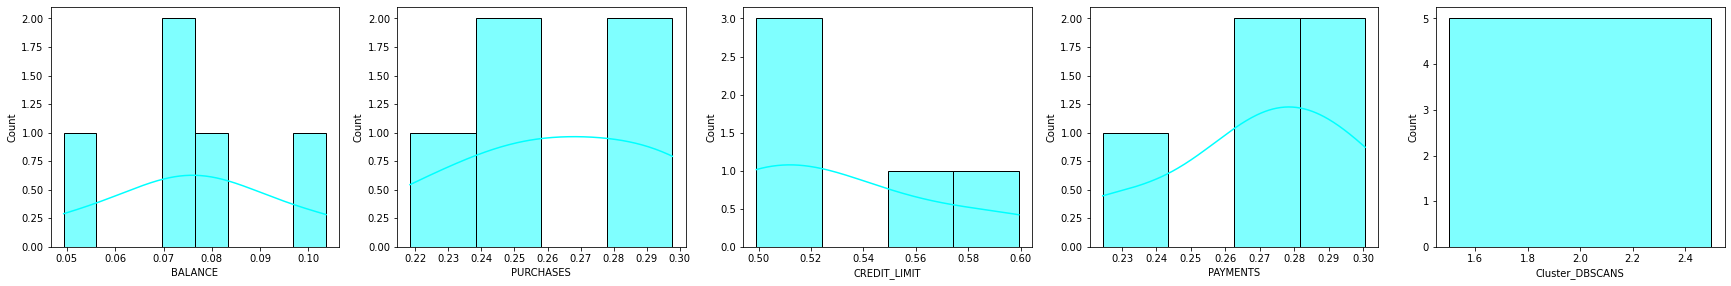

In [ ]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(dbscan_cluster_2.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = dbscan_cluster_2, x = dbscan_cluster_2[col], kde = True, color = 'cyan')

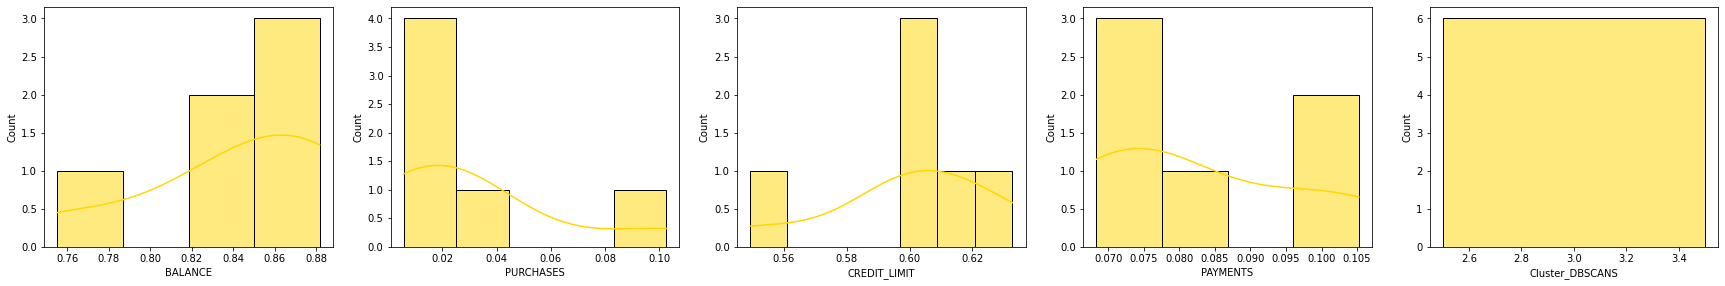

In [ ]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(dbscan_cluster_3.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = dbscan_cluster_3, x = dbscan_cluster_3[col], kde = True, color = 'gold')

## Gaussian Mixture

In [ ]:
gm = GaussianMixture(n_components=4,covariance_type='tied').fit(train_df)


In [ ]:
gm.means_

array([[0.0469702 , 0.01628275, 0.10106674, 0.02535928],
       [0.50175784, 0.05852423, 0.43041036, 0.11010766],
       [0.03642926, 0.04767692, 0.37617657, 0.06426743],
       [0.25222491, 0.02370745, 0.25721614, 0.05580788]])

In [ ]:
labels=gm.predict(train_df)
labels

array([3, 0, 0, ..., 0, 3, 0])

In [ ]:
gm.converged_

True

In [ ]:
cluster_gaussian = gm.predict(df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
data_clustered_gauss = df.copy()
data_clustered_gauss['Cluster_gauss'] = cluster_gaussian + 1
data_clustered_gauss

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,Cluster_gauss
0,40.900749,95.40,1000.0,201.802084,3
1,3202.467416,0.00,7000.0,4103.032597,2
2,2495.148862,773.17,7500.0,622.066742,2
3,1666.670542,1499.00,7500.0,0.000000,2
4,817.714335,16.00,1200.0,678.334763,2
...,...,...,...,...,...
8945,28.493517,291.12,1000.0,325.594462,3
8946,19.183215,300.00,1000.0,275.861322,3
8947,23.398673,144.40,1000.0,81.270775,3
8948,13.457564,0.00,500.0,52.549959,3


In [ ]:
data_clustered_gauss['Cluster_gauss'].value_counts()

2    5548
3    3392
1      10
Name: Cluster_gauss, dtype: int64

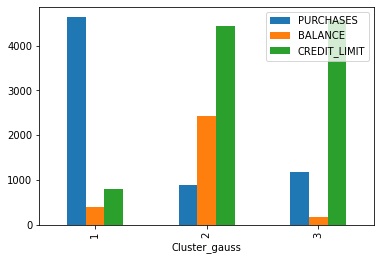

In [ ]:
data_clustered_gauss[['PURCHASES','BALANCE','CREDIT_LIMIT','Cluster_gauss']].groupby('Cluster_gauss').mean().plot(kind='bar',)
plt.show()

In [ ]:
gauss_cluster_1 = data_clustered_gauss[data_clustered_gauss['Cluster_gauss'] == 1]
gauss_cluster_2 = data_clustered_gauss[data_clustered_gauss['Cluster_gauss'] == 2]
gauss_cluster_3 = data_clustered_gauss[data_clustered_gauss['Cluster_gauss'] == 3]


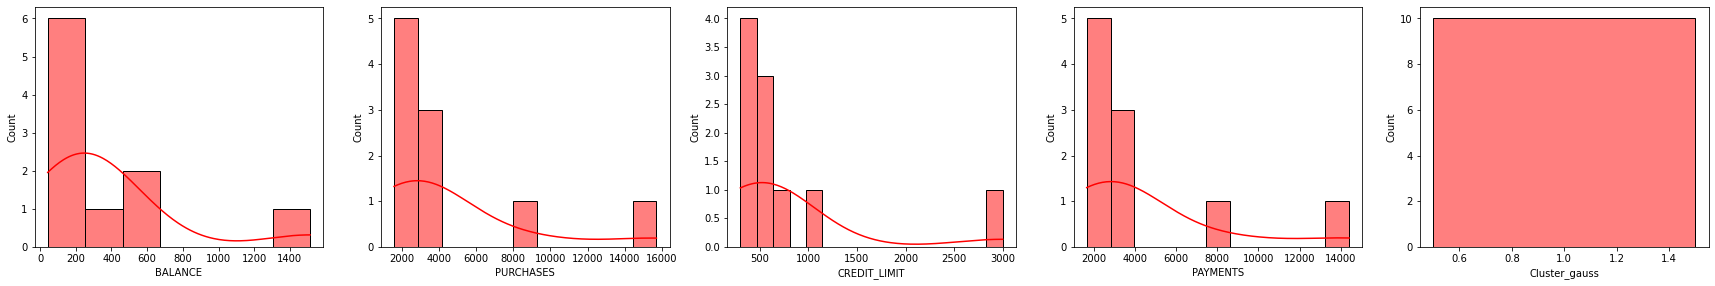

In [ ]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(gauss_cluster_1.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = gauss_cluster_1, x = gauss_cluster_1[col], kde = True, color = 'r')

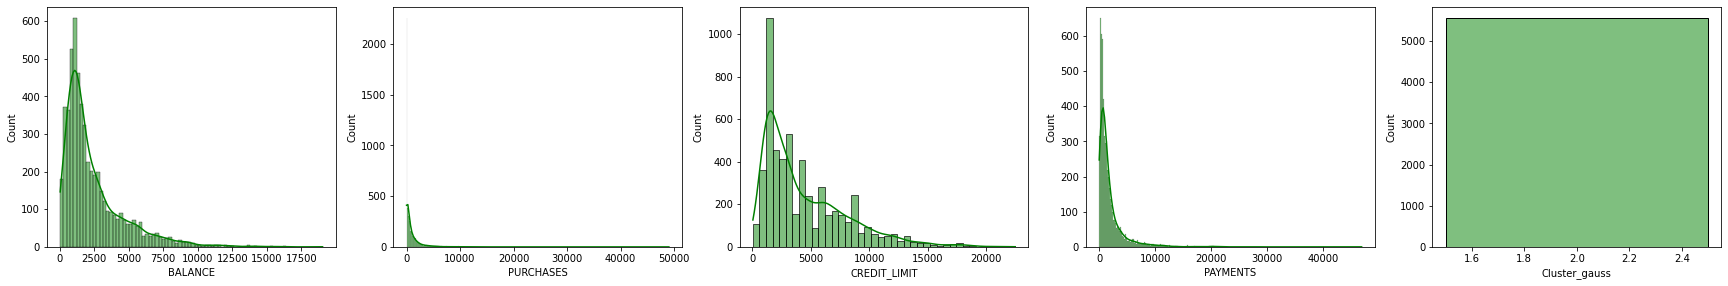

In [ ]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(gauss_cluster_2.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = gauss_cluster_2, x = gauss_cluster_2[col], kde = True, color = 'g')

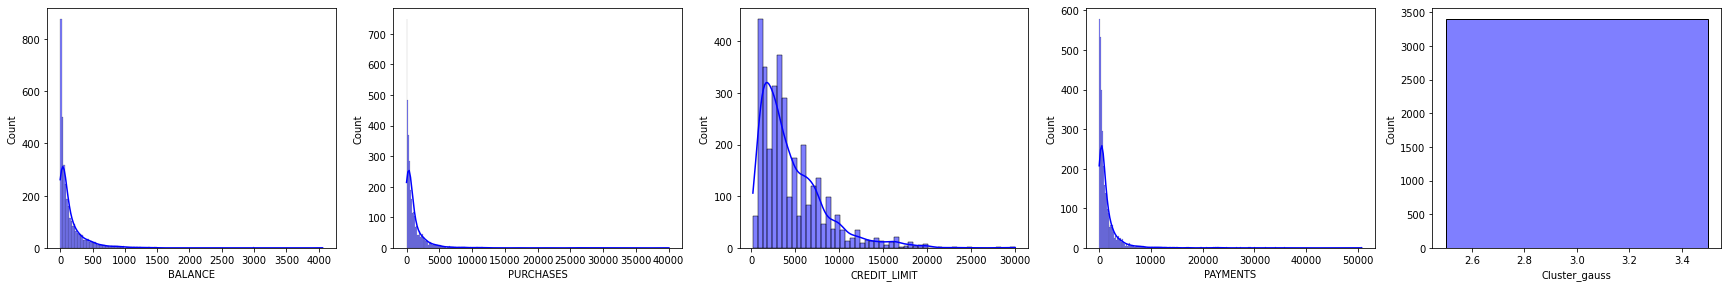

In [ ]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(gauss_cluster_3.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = gauss_cluster_3, x = gauss_cluster_3[col], kde = True, color = 'b')

# Model Inference

In [ ]:
data_inference = df.sample(2)

In [ ]:
data_inference.head()

,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS
2344,994.367302,0.00,10000.0,168.100048
2239,1156.813935,251.38,7500.0,2853.276447


In [ ]:
cluster_k_means_inference=kmeans.predict(data_inference)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
data_inference['Cluster_k_means']=cluster_k_means_inference=kmeans.predict(data_inference)
data_inference

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,BALANCE,PURCHASES,CREDIT_LIMIT,PAYMENTS,Cluster_k_means
2344,994.367302,0.00,10000.0,168.100048,3
2239,1156.813935,251.38,7500.0,2853.276447,3


# Kesimpulan

1. clustering dengan metode DBSCAN sangat baik untuk menentukan outliers
2. Dari hasil clustering KMeans dapat diambil kesimpulan
- Cluster 3 berhak mendapat kelas platinum
- Cluster 1 berhak mendapat kelas gold
- Cluster 0 berhak mendapat kelas silver
- Cluster 2 berhak mendapat kelas bronze

Alasan saya memilih Cluster 1 untuk menjadi pemegang kelas gold dibandingkan Cluster 0 dikarenakan Balance tabungan Cluster 1 lebih aman untuk mendapatkan kelas gold karena Cluster 0 memiliki kemungkinan gagal bayar dibandingkan dengan Cluster 1